In [42]:
# Import dependencies
import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [2]:
engine = create_engine("sqlite:///Hawaii.sqlite", echo=False)

In [205]:
engine.execute('SELECT * FROM Measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65),
 (2, 'USC00519397', '2010-01-02', 0.0, 63),
 (3, 'USC00519397', '2010-01-03', 0.0, 74),
 (4, 'USC00519397', '2010-01-04', 0.0, 76),
 (5, 'USC00519397', '2010-01-07', 0.06, 70)]

In [196]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.Measurement
Station = Base.classes.Station

In [5]:
session = Session(engine)

In [192]:
sel = [Measurement.date,
      Measurement.prcp]
prcp_averages = session.query(*sel).\
        filter(Measurement.date > '2016-08-23').\
        group_by(Measurement.date).\
        order_by(Measurement.date).all()

In [50]:
precip_df = pd.DataFrame(prcp_averages, columns=['Dates','Precipitation'])

<IPython.core.display.Javascript object>


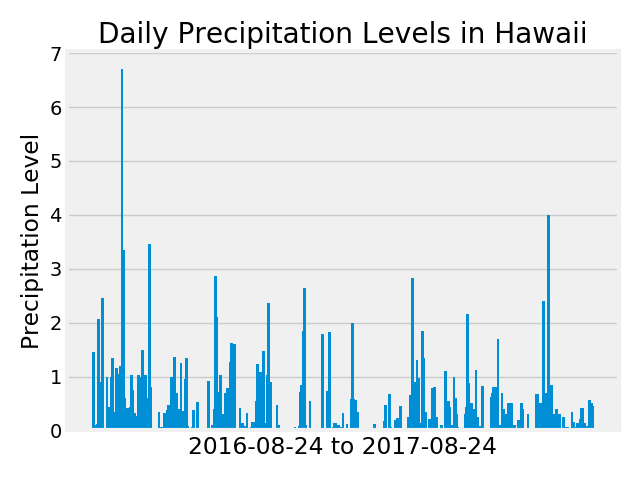

In [67]:
precip_df = pd.DataFrame(prcp_averages, columns=['Dates','Precipitation'])

x = precip_df['Dates']
y = precip_df['Precipitation']
plt.bar(x, y, 2.0)
plt.xticks([], [])
plt.xlabel('2016-08-24 to 2017-08-24')
plt.ylabel('Precipitation Level')
plt.title('Daily Precipitation Levels in Hawaii')
plt.tight_layout()
plt.show()
plt.savefig('Precipitation.png')

In [68]:
precip_df

,Dates,Precipitation
0,2016-08-24,1.45
1,2016-08-25,0.11
2,2016-08-26,0.01
3,2016-08-27,0.12
4,2016-08-28,2.07
5,2016-08-29,0.90
6,2016-08-30,0.05
7,2016-08-31,2.46
8,2016-09-01,0.01
9,2016-09-02,0.03


In [186]:
def calc_temps(start_date, end_date):
    sel = [Measurement.date,
          Measurement.tobs]
    temps = session.query(*sel).\
        filter(Measurement.date > start_date).\
        filter(Measurement.date < end_date).\
        group_by(Measurement.date).\
        order_by(Measurement.date).all()
        
    temps_df = pd.DataFrame(temps, columns=['Dates','Temperature'])
    min_temp = temps_df["Temperature"].min()
    max_temp = temps_df["Temperature"].max()
    avg_temp = temps_df["Temperature"].mean()
    y = (float(min_temp), float(max_temp))
    bar = plt.bar(avg_temp, avg_temp)
    plt.title("Trip Avg Temp")
    plt.ylim(0, 100) 
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')
    #plt.errorbar(avg_temp, avg_temp, yerr=[float(min_temp), float(max_temp)], fmt = '-o')
    plt.show()
    return avg_temp
    

    

<IPython.core.display.Javascript object>


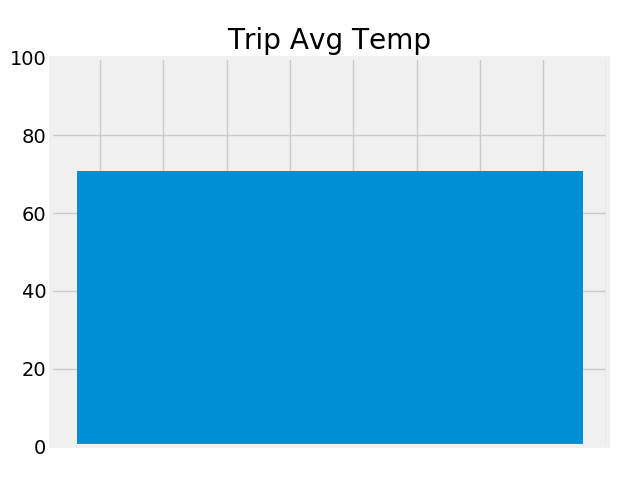

<IPython.core.display.Javascript object>


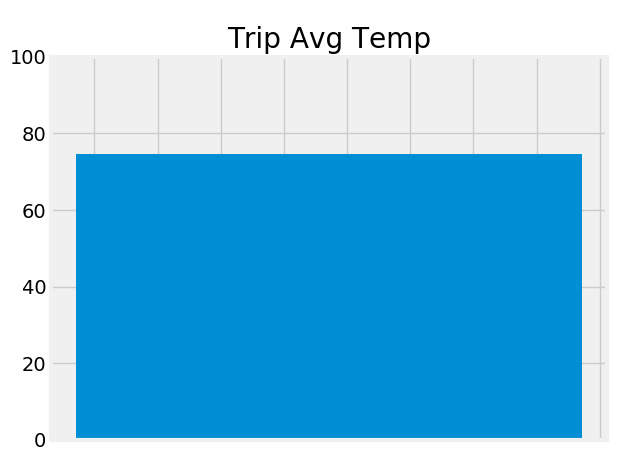

In [191]:
vacation1 = calc_temps('2010-08-20', '2016-08-26')
vacation2 = calc_temps('2016-09-20', '2016-10-05')

In [199]:
num_of_stations = session.query(func.count(Station.station)).all()
print("The number of weather Stations : " + str(num_of_stations)[2])

The number of weather Stations : 9


In [283]:
sel = [Measurement.station, Measurement.date]

station = session.query(*sel).\
    order_by(Measurement.station).\
    group_by(Measurement.date).count()

#stations_df = pd.DataFrame(station, columns=['stations','dates'])

In [247]:
stations = session.query(func.count(Measurement.date)).all()
stations

[(18103)]

In [265]:
sel = [Measurement.station, Measurement.date]


station = session.query(Measurement.station, func.count(Measurement.date).\
    group_by(Measurement.station).all()

station

SyntaxError: invalid syntax (<ipython-input-265-dbc610aef616>, line 5)